In [20]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

iris_df = pd.read_csv("../input/iris/Iris.csv")
tips_df = pd.read_csv("../input/tipping/tips.csv")
titanic = pd.read_csv("../input/titanic/train.csv")
gap_df = pd.read_csv("../input/gapminder-datacamp-2007/gapminder_full.csv")
eth_data = pd.read_csv("../input/top-50-cryptocurrency-historical-prices/Ethereum.csv" , 
                       index_col =["SNo"] , 
                       parse_dates=['Date'])
start = "2020-01-01"
end = "2021-07-31"
mask = (eth_data['Date'] >= start) & (eth_data['Date'] <= end)
eth_data = eth_data.loc[mask]

**Scatter Plot**

In [3]:
# Normal scatter plot
fig = px.scatter(iris_df, 
                 x="SepalWidthCm", 
                 y="SepalLengthCm")
fig.show()

In [4]:
# Scatter plot with markers
fig = px.scatter(data_frame=iris_df, 
                 x="SepalWidthCm", 
                 y="SepalLengthCm", 
                 color="Species",
                 #size = "PetalLengthCm",
                 symbol = "Species"
                 )
fig.show()

**Line Plot**

In [5]:
# Basic line plot
fig = px.line(data_frame=gap_df.query("country=='Canada'"),
              x="year",
              y="life_exp",
              color='country')
fig.show()

In [6]:
# Line plot with markers and multiple data
fig = px.line(data_frame= gap_df.query("continent=='Oceania'"),
              x="year", 
              y="life_exp", 
              markers =True,
              #symbol = "country",
              color='country')
fig.show()

**Violin Plot**

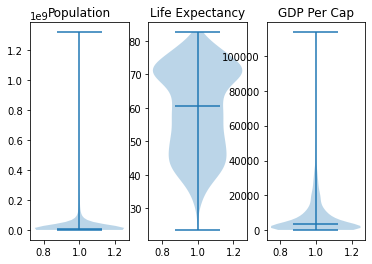

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv("../input/gapminder-datacamp-2007/gapminder_full.csv", error_bad_lines=False, encoding="ISO-8859-1")

population = dataframe.population
life_exp = dataframe.life_exp
gdp_cap = dataframe.gdp_cap

# Create figure with three axes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

# Plot violin plot on axes 1
ax1.violinplot(dataframe.population, showmedians=True)
ax1.set_title('Population')

# Plot violin plot on axes 2
ax2.violinplot(life_exp, showmedians=True)
ax2.set_title('Life Expectancy')

# Plot violin plot on axes 3
ax3.violinplot(gdp_cap, showmedians=True)
ax3.set_title('GDP Per Cap')

plt.show()

**Bar plot**

In [16]:
# Bar plot with hover text and continous hover scale
fig = px.bar(data_frame= gap_df.query("country == 'Canada'"),
             x='year', 
             y='population',
             hover_data=['life_exp', 'gdp_cap'], 
             color='life_exp',
             color_continuous_scale="Emrld")
fig.show()

In [17]:
# Grouped Bar plot
x= [1,3,5,7,9,11,13] 
y1 = [21,11,17,32]
y2= [17,18,29,40]

fig = go.Figure(data=[
    go.Bar(x=x, y=y1),
    go.Bar(x=x, y=y2)
])
fig.update_layout(barmode='group')
fig.show()

**Box plot**

In [19]:
# Grouped Box plot
fig = px.box(tips_df, 
             x="day", 
             y="total_bill", 
             color="smoker" )
fig.update_traces(quartilemethod="linear") 
fig.show()

**Pie plot**

In [22]:
fig = px.pie(data_frame= gap_df.query("year == 2007").query("continent == 'Europe'"), 
             values='population', 
             names='country',
             title='Population of Europe continent',
             hover_data=['life_exp'], 
             labels={'lifeExp':'life expectancy'})
fig.update_traces(textposition='inside', 
                  textinfo='percent+label')
fig.show()